# [Lab Session 4](deconvolution.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

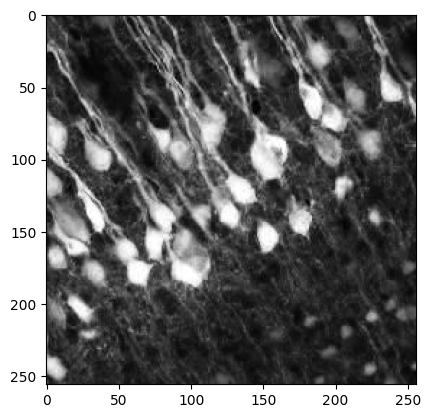

In [2]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [ ]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2


[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


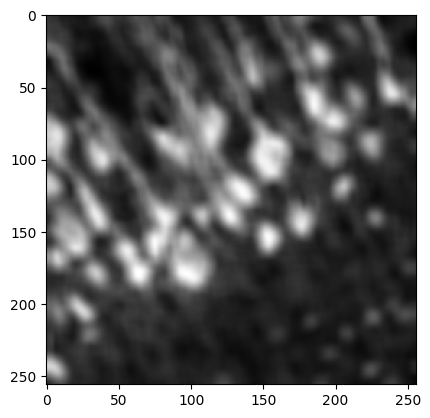

In [4]:
plt.imshow(conv(img,psf,mode = "same", boundary="symm"),"grey")
img_psf = conv(img,psf,mode = "same", boundary="symm")

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

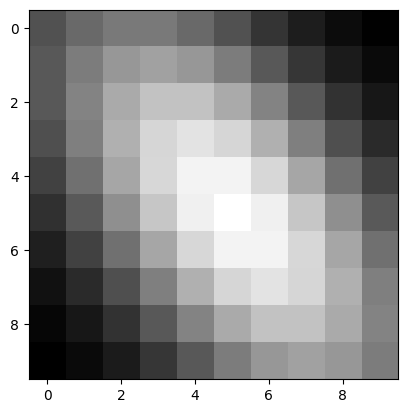

In [5]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')

Apply the second psf to the image:

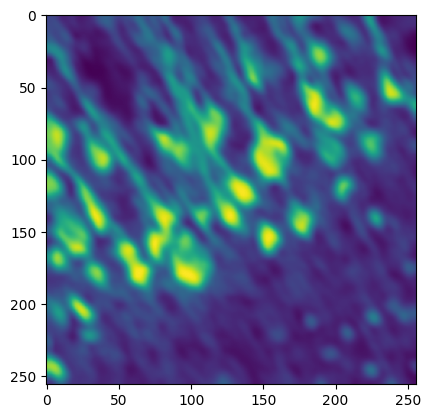

In [10]:
gaus = create_psf(10)
gaus_blurred_image = conv(img,gaus,mode = "same", boundary="symm")
plt.imshow(conv(img,gaus,mode = "same", boundary="symm"))


**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [7]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    psf_flip = np.flip(psf)
    for x in range(n_iterations):
        conv_one = image/(conv(img_deconv,psf,"same", "symm"))
        corrected = (conv(conv_one, psf_flip, "same", "symm"))
        img_deconv*=corrected
    img_deconv = img_deconv.clip(0,1)
    return img_deconv


**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [9]:
apply = richardson_lucy_deconvolution(img_psf,psf,100)

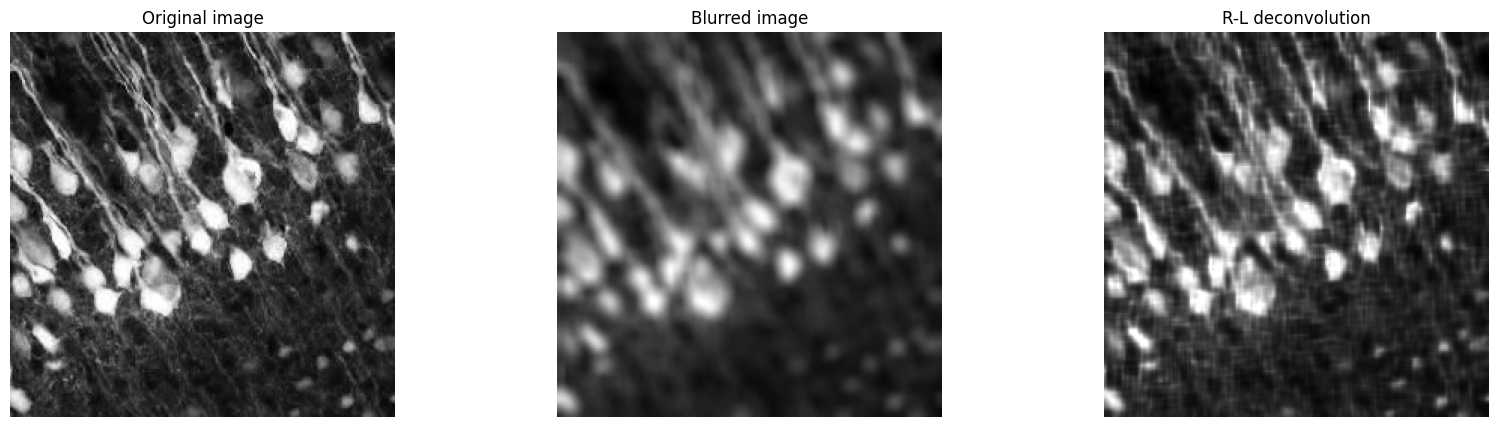

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_psf, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(apply, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [13]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

noise_img = img + noise
noise_clip = noise_img.clip(0,1)


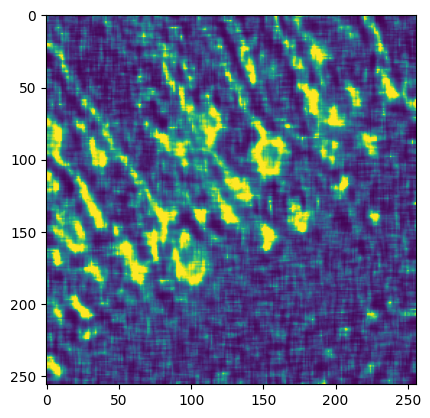

In [15]:
noise_RL = richardson_lucy_deconvolution(noise_clip,psf,10)
plt.imshow(noise_RL)

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

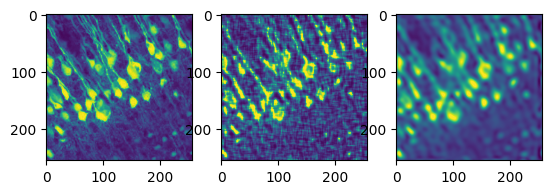

In [ ]:
wiener_img = wiener(img_psf, psf, balance=2, clip=True)

plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(noise_RL)
plt.subplot(1,3,3)
plt.imshow(wiener_img)


**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

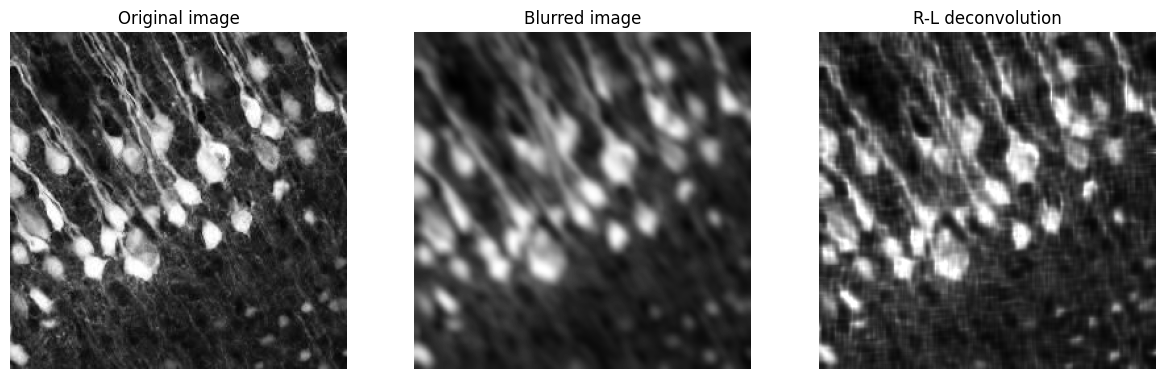

Text(0.5, 1.0, 'apply R-L to noise')

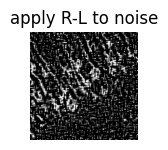

In [20]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

apply_richard_psf = richardson_lucy_deconvolution(img_psf,psf,100)
apply_richard_noise = richardson_lucy_deconvolution(noise_RL,psf,100)
apply_wiener = wiener(img_psf, psf, balance=2, clip=True)
gaus_blurred_image = conv(img,gaus,mode = "same", boundary="symm")



plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 4, 2)
plt.axis('off')
plt.imshow(gaus_blurred_image, 'gray')
plt.title('Blurred image')
plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(apply_richard_psf, 'gray')
plt.title('R-L deconvolution')
plt.show()
plt.subplot(1,4,4)
plt.axis("off")
plt.imshow(apply_richard_noise,"grey")
plt.title("apply R-L to noise")


**[Task 8.]()** Use a wrong PSF to restore the image